In [1]:
# Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading file Data A file
zipcode_df = pd.read_csv("./data/tasksheetdataa.csv")
zipcode_df.head()

,fileid,stusab,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc
0,UR1US,US,0,1,479832,18570,860,0,601,166659789,799296,ZCTA5 00601,S,18570,7744,18.180556,-66.749961,Z5
1,UR1US,US,0,1,479836,41520,860,0,602,79288158,4446273,ZCTA5 00602,S,41520,18073,18.362268,-67.176130,Z5
2,UR1US,US,0,1,479839,54689,860,0,603,81880442,183425,ZCTA5 00603,S,54689,25653,18.455183,-67.119887,Z5
3,UR1US,US,0,1,479842,6615,860,0,606,109580061,12487,ZCTA5 00606,S,6615,2877,18.158345,-66.932911,Z5
4,UR1US,US,0,1,479847,29016,860,0,610,93021467,4172001,ZCTA5 00610,S,29016,12618,18.290955,-67.125868,Z5


In [3]:
# Reading file ZCTA file
state_df = pd.read_csv("./data/tasksheetdataz.csv")
state_df.head()

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [4]:
# Inner joining
combined_df = pd.merge(zipcode_df[["zcta5", "name", "arealand", "pop100"]], 
                   state_df[["zip", "city", "state", "latitude", "longitude"]], 
                   left_on="zcta5",
                   right_on="zip",
                   how="inner")
combined_df.head()

,zcta5,name,arealand,pop100,zip,city,state,latitude,longitude
0,1001,ZCTA5 01001,29635470,16769,1001,Agawam,Massachusetts,42.0702,-72.6227
1,1002,ZCTA5 01002,142556362,29049,1002,Amherst,Massachusetts,42.3671,-72.4646
2,1003,ZCTA5 01003,1842384,10372,1003,Amherst,Massachusetts,42.3919,-72.5248
3,1005,ZCTA5 01005,114586903,5079,1005,Barre,Massachusetts,42.4097,-72.1084
4,1007,ZCTA5 01007,136345999,14649,1007,Belchertown,Massachusetts,42.2751,-72.4110


In [5]:
# Deletes unwanted string on name column to have 5 -digit ZIP codes
combined_df['name'] = combined_df['name'].map(lambda x: x.lstrip('ZCTA5 '))
combined_df.head()

,zcta5,name,arealand,pop100,zip,city,state,latitude,longitude
0,1001,01001,29635470,16769,1001,Agawam,Massachusetts,42.0702,-72.6227
1,1002,01002,142556362,29049,1002,Amherst,Massachusetts,42.3671,-72.4646
2,1003,01003,1842384,10372,1003,Amherst,Massachusetts,42.3919,-72.5248
3,1005,01005,114586903,5079,1005,Barre,Massachusetts,42.4097,-72.1084
4,1007,01007,136345999,14649,1007,Belchertown,Massachusetts,42.2751,-72.4110


In [6]:
# Drops unwanted columns
five_digit = combined_df.drop(columns=["zcta5", "zip"])

# Renames "name" column
five_digit = five_digit.rename(columns={"name":"5digit"})
five_digit

,5digit,arealand,pop100,city,state,latitude,longitude
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110
...,...,...,...,...,...,...,...
32969,99923,35937519,87,Hyder,Alaska,55.9169,-130.0247
32970,99925,144503281,819,Klawock,Alaska,55.5526,-133.0555
32971,99926,343947256,1460,Metlakatla,Alaska,55.1215,-131.5790
32972,99927,589688205,94,Point Baker,Alaska,56.3528,-133.6211


In [9]:
# Transform area land into square miles by dividing it by 2,589,988
five_digit["squaremiles"] = five_digit.loc[:,"arealand"].div(2589988)
five_digit.head()

,5digit,arealand,pop100,city,state,latitude,longitude,squaremiles,density
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227,11.442319,1465.821678
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646,55.041321,527.779797
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248,0.711348,14608.450704
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084,44.242252,114.805606
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110,52.643487,278.286474


In [10]:
# Calculating density (population/km square)
five_digit["density"] = round(five_digit["pop100"].div(five_digit["squaremiles"]),2)
five_digit.head()

,5digit,arealand,pop100,city,state,latitude,longitude,squaremiles,density
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227,11.442319,1465.52
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646,55.041321,527.77
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248,0.711348,14580.76
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084,44.242252,114.80
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110,52.643487,278.27


In [13]:
# 5-digit code with highest density
highest_density = five_digit["density"].max()
highest_density_zip = five_digit["5digit"].loc[five_digit["density"].idxmax()]
highest_density_city = five_digit["city"].loc[five_digit["density"].idxmax()]
highest_density_state = five_digit["state"].loc[five_digit["density"].idxmax()]
highest_density_pop = five_digit["pop100"].loc[five_digit["density"].idxmax()]
highest_density_land = five_digit["squaremiles"].loc[five_digit["density"].idxmax()]

print(f'The 5-ZIP code with highest density is {highest_density_zip}, with {highest_density} residents/square miles, and it is located in the {highest_density_city} city, in the state {highest_density_state}.')
print(f'The 5-ZIP code {highest_density_zip} has a total of {highest_density_pop} residents and an area of {round(highest_density_land,3)} square miles.')

The 5-ZIP code with highest density is 20052, with 172372.47 residents/square miles, and it is located in the Washington city, in the state District of Columbia.
The 5-ZIP code 20052 has a total of 470 residents and an area of 0.003 square miles.


In [14]:
five_digit.sort_values(by="density")

,5digit,arealand,pop100,city,state,latitude,longitude,squaremiles,density
21997,63902,27936,0,Poplar Bluff,Missouri,36.7125,-90.4070,0.010786,0.00
22088,64102,797713,0,Kansas City,Missouri,39.0861,-94.6066,0.307999,0.00
17759,3792,52522,0,Madison,Wisconsin,43.0696,-89.4239,0.020279,0.00
25873,75270,14850,0,Dallas,Texas,32.7813,-96.8019,0.005734,0.00
7744,25305,202349,0,Charleston,West Virginia,38.3358,-81.6123,0.078127,0.00
...,...,...,...,...,...,...,...,...,...
6166,20390,10935,584,Washington,District of Columbia,38.8933,-77.0146,0.004222,138322.18
2468,10075,477958,26121,New York,New York,40.7143,-74.0060,0.184541,141546.07
2452,10028,813698,45141,New York,New York,40.7763,-73.9529,0.314171,143683.10
2479,10162,29442,1685,New York,New York,40.7699,-73.9511,0.011368,148228.03


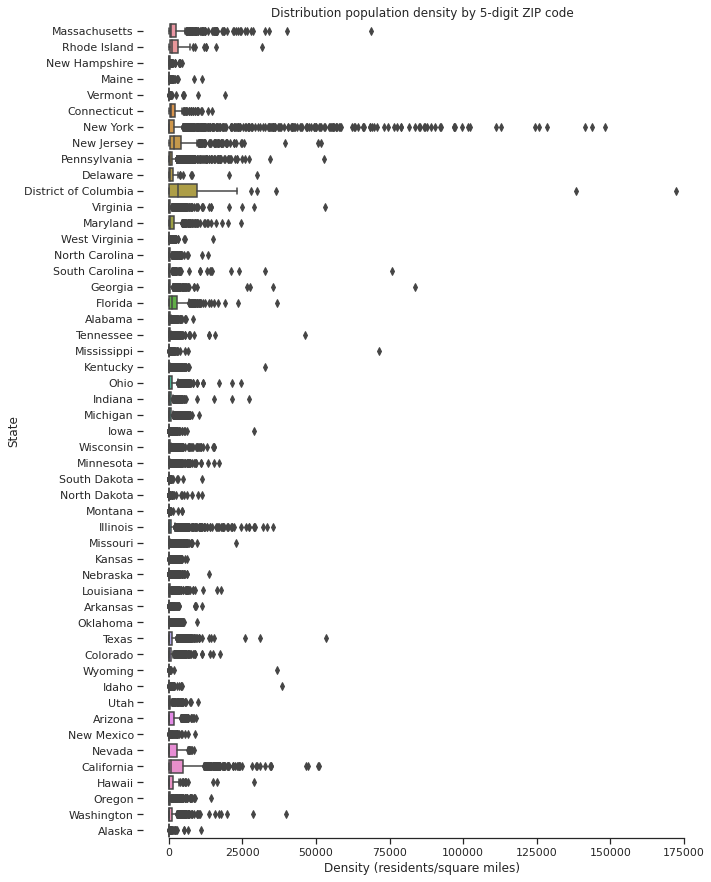

In [31]:
# Shows number of density by state

plt.figure(figsize=(10,15))
dens = sns.boxplot(y=five_digit["state"], x=five_digit["density"] )
dens.set_title('Distribution population density by 5-digit ZIP code')

dens.set(ylabel="State", xlabel="Density (residents/square miles)")
sns.despine(trim=True, left=True)


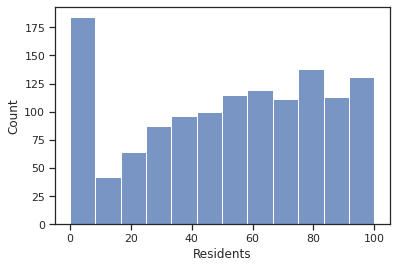

In [46]:
# Distribution 5-digit ZIP codes with less than 100 residents.
lower100_5zip = five_digit[five_digit["pop100"]<=100]

l100 = sns.histplot(x=lower100_5zip["pop100"]);
l100.set(ylabel="Count", xlabel="Residents");

In [47]:
five_digit[five_digit["pop100"]<=100].count()

5digit         1300
arealand       1300
pop100         1300
city           1300
state          1299
latitude       1300
longitude      1300
squaremiles    1300
density        1300
dtype: int64

In [28]:
# Count how many zip codes have less than 100 residents
five_digit.groupby('state')['pop100'].apply(lambda x: x[x < 100].count()).sort_values(ascending=False)

state
Texas                   89
New York                81
Pennsylvania            68
California              62
Montana                 44
Ohio                    41
Missouri                40
Alaska                  38
New Mexico              36
Colorado                34
Arkansas                34
Iowa                    32
Kentucky                31
Illinois                31
Minnesota               31
Maine                   30
Nebraska                28
Wyoming                 27
Alabama                 26
Kansas                  26
Washington              25
Georgia                 24
South Dakota            24
District of Columbia    24
North Dakota            24
Virginia                23
Oregon                  22
Indiana                 21
Michigan                21
West Virginia           20
North Carolina          20
Idaho                   19
Wisconsin               17
Oklahoma                17
Arizona                 17
Tennessee               16
Maryland              

In [11]:
# Creates dataset containing only population with more than 10 residents
five_digit_bigger9 = five_digit.loc[(five_digit["pop100"] >9)]
five_digit_bigger9.head()

,5digit,arealand,pop100,city,state,latitude,longitude,kmsquare,density
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227,29.64,565.76
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646,142.56,203.77
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248,1.84,5636.96
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084,114.59,44.32
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110,136.35,107.44


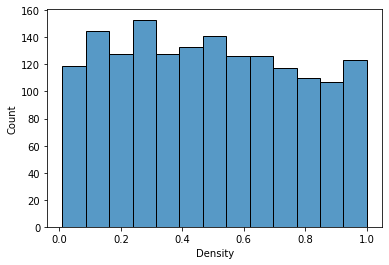

In [12]:
# Distribution 5-digit ZIP codes with population density lower than 1.
lowerdens_5zip = five_digit_bigger9[five_digit_bigger9["density"]<=1]


ld = sns.histplot(x=lowerdens_5zip["density"]);
ld.set(ylabel="Count", xlabel="Density");

In [13]:
# States with more 5-digit ZIP codes
five_digit.groupby('state')['5digit'].count().sort_values(ascending=False)

state
Texas                   1935
Pennsylvania            1795
New York                1794
California              1761
Illinois                1383
Ohio                    1195
Missouri                1023
Michigan                 986
Florida                  983
Iowa                     934
Virginia                 896
Minnesota                884
North Carolina           808
Indiana                  775
Wisconsin                774
Kentucky                 767
Georgia                  735
West Virginia            706
Kansas                   697
Oklahoma                 648
Alabama                  642
Tennessee                628
Washington               596
New Jersey               595
Arkansas                 591
Nebraska                 581
Massachusetts            537
Colorado                 525
Louisiana                515
Maryland                 468
Maine                    432
South Carolina           424
Mississippi              423
Oregon                   417
Arizona 

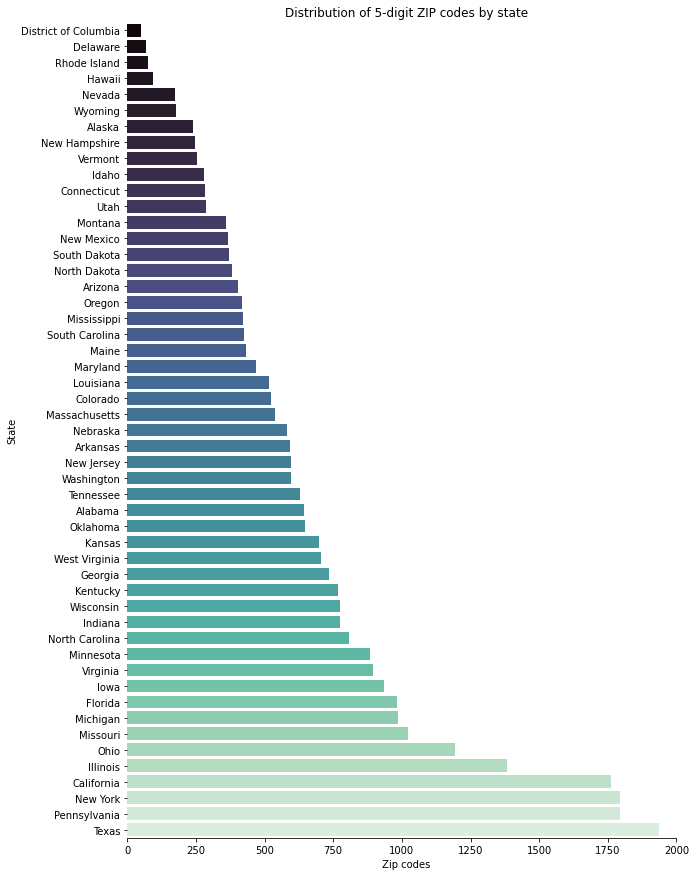

In [19]:
# Shows number of ZIP codes by state
zipcode5_state = five_digit.groupby(by="state", as_index=False, )["5digit"].nunique().sort_values(by="5digit")

plt.figure(figsize=(10,15))
zip = sns.barplot(x='5digit', y='state', data=zipcode5_state, palette="mako")
zip.set_title('Distribution of 5-digit ZIP codes by state')

zip.set(ylabel="State", xlabel="Zip codes")
sns.despine(trim=True, left=True)


In [32]:
# Copy five_digit into a new df
three_digit = five_digit.copy()
three_digit.head()

,5digit,arealand,pop100,city,state,latitude,longitude,squaremiles,density
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227,11.442319,1465.52
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646,55.041321,527.77
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248,0.711348,14580.76
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084,44.242252,114.80
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110,52.643487,278.27


In [34]:
# Gets first 3 digits of a 5-digit ZIP code:
three_digit["3-digit"] = three_digit["5digit"].astype(str).str[:3]

three_digit.head()

,5digit,arealand,pop100,city,state,latitude,longitude,squaremiles,density,3-digit
0,01001,29635470,16769,Agawam,Massachusetts,42.0702,-72.6227,11.442319,1465.52,010
1,01002,142556362,29049,Amherst,Massachusetts,42.3671,-72.4646,55.041321,527.77,010
2,01003,1842384,10372,Amherst,Massachusetts,42.3919,-72.5248,0.711348,14580.76,010
3,01005,114586903,5079,Barre,Massachusetts,42.4097,-72.1084,44.242252,114.80,010
4,01007,136345999,14649,Belchertown,Massachusetts,42.2751,-72.4110,52.643487,278.27,010


In [35]:
# Drops unwanted columns
three_digit = three_digit.drop(columns=["5digit", "latitude", "longitude", "density"])

In [37]:
# Group by 3-ZIP code
three_digit = three_digit.groupby(by=["3-digit", "city", "state"], as_index=False).agg({'arealand':'sum','pop100':'sum', 'squaremiles':'sum'})

In [39]:
# Calculates density for 3-digit ZIP code (population/squaremiles)
three_digit["density"] = round(three_digit["pop100"].div(three_digit["squaremiles"]))
three_digit.head()


,3-digit,city,state,arealand,pop100,squaremiles,density
0,000,Ackworth,Iowa,62132136,680,23.989353,28.0
1,000,Adair,Iowa,279019969,1297,107.730217,12.0
2,000,Adel,Iowa,296262168,6594,114.387467,58.0
3,000,Albion,Iowa,69351844,730,26.776898,27.0
4,000,Alden,Iowa,317608669,1676,122.629398,14.0


In [41]:
three_digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27671 entries, 0 to 27670
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3-digit      27671 non-null  object 
 1   city         27671 non-null  object 
 2   state        27671 non-null  object 
 3   arealand     27671 non-null  int64  
 4   pop100       27671 non-null  int64  
 5   squaremiles  27671 non-null  float64
 6   density      27671 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


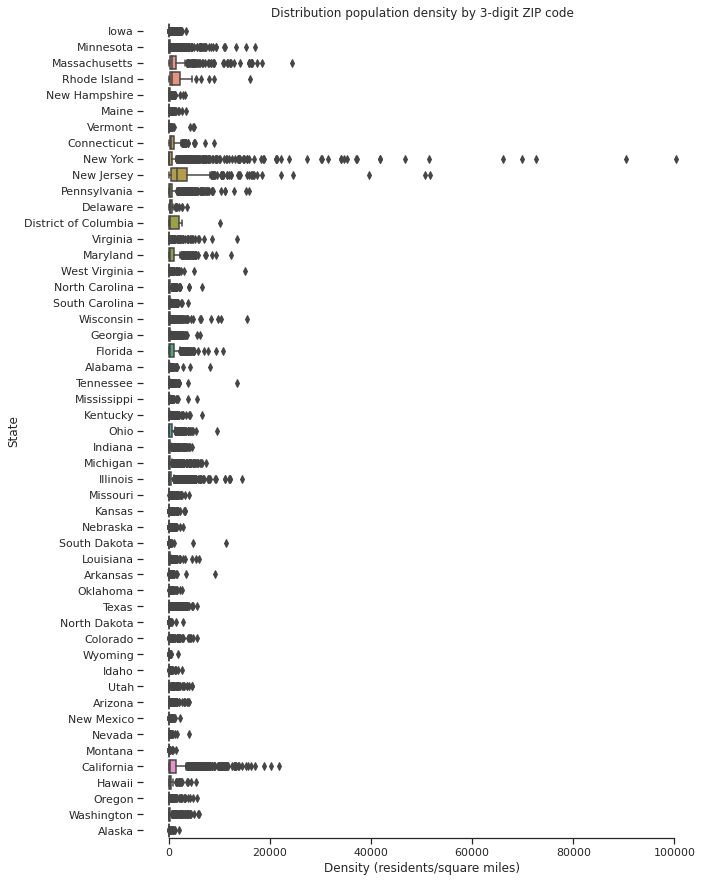

In [42]:
# Shows number of density by state

plt.figure(figsize=(10,15))
dens = sns.boxplot(y=three_digit["state"], x=three_digit["density"] )
dens.set_title('Distribution population density by 3-digit ZIP code')

dens.set(ylabel="State", xlabel="Density (residents/square miles)")
sns.despine(trim=True, left=True)

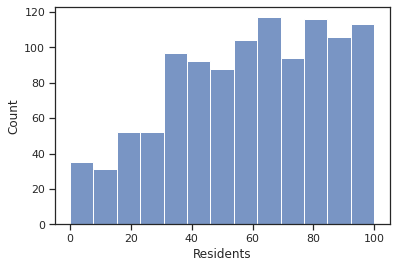

In [45]:
# Distribution 5-digit ZIP codes with less than 100 residents.
lower100_3zip = three_digit[three_digit["pop100"]<=100]

l100a = sns.histplot(x=lower100_3zip["pop100"]);
l100a.set(ylabel="Count", xlabel="Residents");

In [48]:
three_digit[three_digit["pop100"]<=100].count()

3-digit        1097
city           1097
state          1097
arealand       1097
pop100         1097
squaremiles    1097
density        1097
dtype: int64

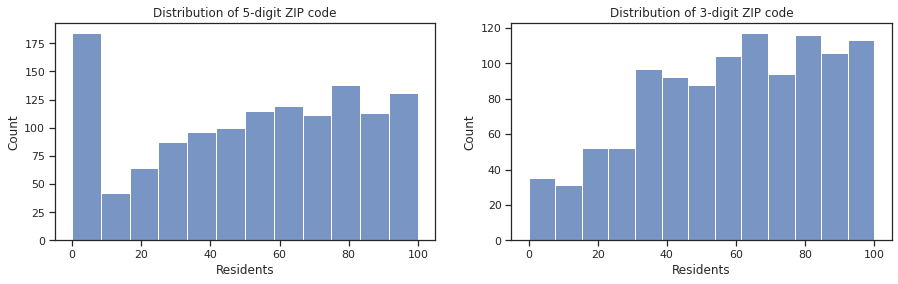

In [49]:
# Shows distribution of ZIP codes in places with lessa than 100 residents

lower100_5zip = five_digit[five_digit["pop100"]<=100]
lower100_3zip = three_digit[three_digit["pop100"]<=100]

fig, ax = plt.subplots(1, 2, figsize =(15,4))

ax[0].set_title('Distribution of 5-digit ZIP code')
sns.histplot(x=lower100_5zip["pop100"], ax=ax[0]);
    
ax[1].set_title('Distribution of 3-digit ZIP code')
sns.histplot(x=lower100_3zip["pop100"], ax=ax[1]);

ax[0].set(ylabel="Count", xlabel="Residents");
ax[1].set(ylabel="Count", xlabel="Residents");

In [52]:
# 3-digit code with lowest density
lowest_density = three_digit["3-digit"].loc[three_digit["density"].min()]
lowest_density_zip = three_digit["3-digit"].loc[three_digit["density"].idxmin()]
lowest_density_city = three_digit["city"].loc[three_digit["density"].idxmin()]
lowest_density_state = three_digit["state"].loc[three_digit["density"].idxmin()]
lowest_density_pop = three_digit["pop100"].loc[three_digit["density"].idxmin()]
lowest_density_land = three_digit["squaremiles"].loc[three_digit["density"].idxmin()]

print(f'The 3-ZIP code with lowest density is {lowest_density_zip}, with {lowest_density} residents/square miles, and it is located in the {lowest_density_city} city, in the state {lowest_density_state}.')
print(f'The 3-ZIP code {lowest_density_zip} has a total of {lowest_density_pop} residents and an area of {round(lowest_density_land,3)} square miles.')

The 3-ZIP code with lowest density is 054, with 000 residents/square miles, and it is located in the Saint Albans Bay city, in the state Vermont.
The 3-ZIP code 054 has a total of 0 residents and an area of 0.375 square miles.


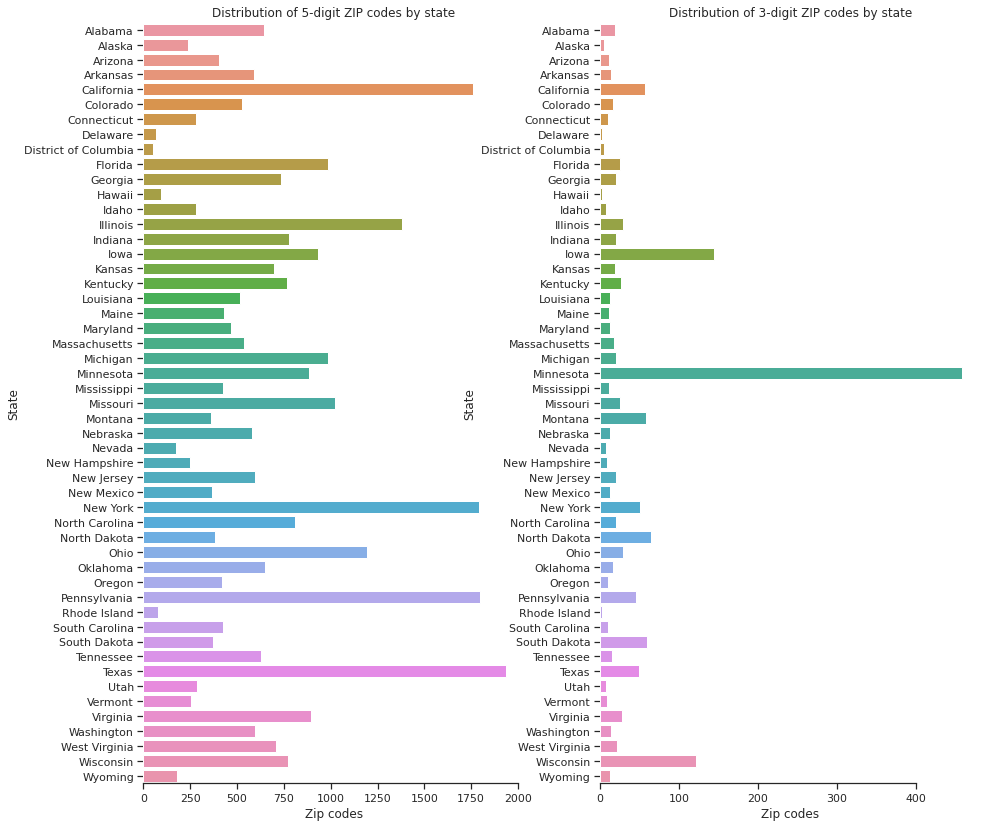

In [57]:
# Shows number of ZIP codes by state
zipcode5_state = five_digit.groupby(by="state", as_index=False, )["5digit"].nunique()
zipcode3_state = three_digit.groupby(by="state", as_index=False, )["3-digit"].nunique()

fig, ax = plt.subplots(1, 2, figsize =(15,14))
    
ax[0].set_title('Distribution of 5-digit ZIP codes by state')
sns.barplot(x='5digit', y='state', data=zipcode5_state, ax=ax[0])
    
ax[1].set_title('Distribution of 3-digit ZIP codes by state')
sns.barplot(x='3-digit', y='state', data=zipcode3_state, ax=ax[1])

ax[0].set(ylabel="State", xlabel="Zip codes")
ax[1].set(ylabel="State", xlabel="Zip codes")
sns.despine(trim=True, left=True)

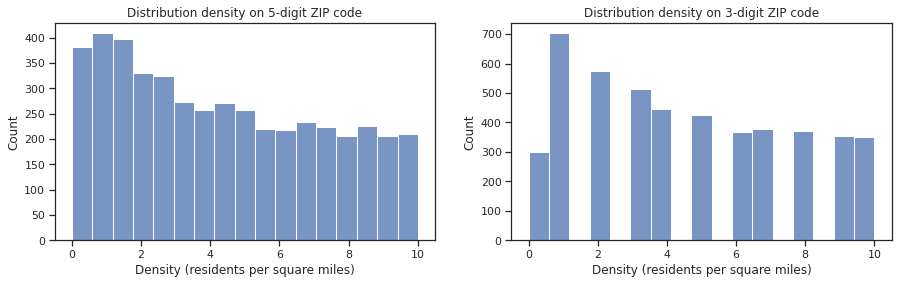

In [65]:
# Creates dataset containing only population with more than 10 residents
five_digit_bigger9 = five_digit.loc[(five_digit["pop100"] >9)]
# Distribution 5-digit ZIP codes with population density lower than 1.
lowerdens_5zip = five_digit_bigger9[five_digit_bigger9["density"]<=10]

# Creates dataset containing only population with more than 10 residents
three_digit_bigger9 = three_digit.loc[(three_digit["pop100"] >9)]
# Distribution 3-digit ZIP codes with population density lower than 1.
lowerdens_3zip = three_digit_bigger9[three_digit_bigger9["density"]<=10]

fig, ax = plt.subplots(1, 2, figsize =(15,4))

ax[0].set_title('Distribution density on 5-digit ZIP code')
sns.histplot(x=lowerdens_5zip["density"], ax=ax[0]);
    
ax[1].set_title('Distribution density on 3-digit ZIP code')
sns.histplot(x=lowerdens_3zip["density"], ax=ax[1]);

ax[0].set(ylabel="Count", xlabel="Density (residents per square miles)");
ax[1].set(ylabel="Count", xlabel="Density (residents per square miles)");